Install necessary python libraries

In [ ]:
import sys
!{sys.executable} -m pip install gitpython pandas requests xarray git

Clone github repository to a local source folder, here defined as "/tmp".

In [8]:
from git import Repo

source_dir = "/tmp"
repo = Repo.clone_from("git@github.com:metocean/storm_surge.git", f"{source_dir}/storm_surge")

Download LINZ data to a local data folder, here defined as "/tmp/linz/raw". We download the sea level data as netCDF file and the site information as a txt file.

In [8]:
sys.path.append(f"{source_dir}/storm_surge/storm_surge/data_processing/linz_waterlevel")
from linz_download import LINZ_Site
from datetime import datetime

# user-defined
site_name = "AUCT"
data_dir = f"/tmp/linz/raw/{site_name}"
output_file = f"{data_dir}/{site_name}_raw.nc"
readme_file = f"{data_dir}/{site_name}_readme.txt"
tstart = datetime(2013, 1, 1)
tend = datetime(2018, 1, 1)

site = LINZ_Site(site_name, tstart=tstart, tend=tend)
print('downloading data')
site.get_data()
print('saving to netcdf')
site.to_netcdf(output_file)
print('downloading readme')
site.get_readme(readme_file)

downloading data
Year:  2013
Failed downloading on /tmp/tmp8biotzqc/AUCT_40_2013326.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/40/AUCT_40_2013326.zip</Key><RequestId>709DG2R3X2Y9RQ5J</RequestId><HostId>K7GzyqcfgUGqfQ9g5t4ZFxnP7jkCWojzfuS42fRBK3rsZC5GlWx+MHIpOm1cC58eQVFZ+RRWoPvNAMGuVBQIAQ==</HostId></Error> 404
Failed downloading on /tmp/tmp8biotzqc/AUCT_40_2013327.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/40/AUCT_40_2013327.zip</Key><RequestId>70980HWS0T6Z62KG</RequestId><HostId>5i7fCRr9Prx6Opz7N4S63bWhqx6GEARyjhjvJOtWcNDKpR3FdOU9tMf3fjwmXw8SsoiaElHznK4=</HostId></Error> 404
Failed downloading on /tmp/tmp8biotzqc/AUCT_40_2013328.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/4

Plot LINZ data

Using matplotlib backend: module://ipympl.backend_nbagg


<xarray.Dataset>
Dimensions:    (time: 610995, sensor: 2, site: 1)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01 ... 2019-03-02T23:53:00
  * sensor     (sensor) int64 40 41
Dimensions without coordinates: site
Data variables:
    elev       (sensor, time) float32 ...
    longitude  (site) float64 ...
    latitude   (site) float64 ...
Attributes:
    site_name:      AUCT
    location_name:  Auckland

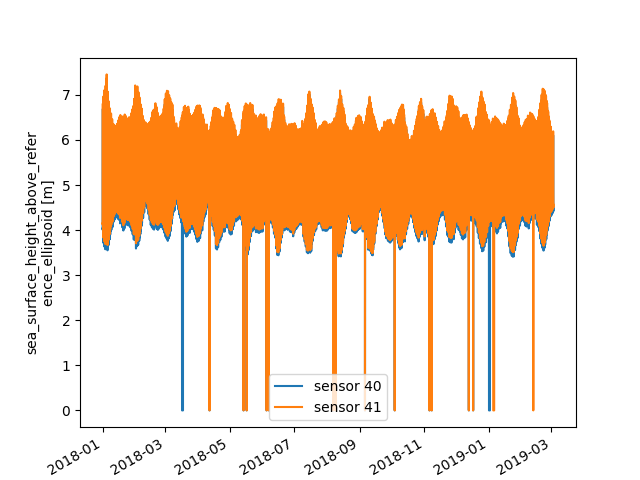

In [9]:
%matplotlib
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_dataset(output_file)
ds.elev.sel(sensor=40, drop=True).plot(label='sensor 40');
ds.elev.sel(sensor=41, drop=True).plot(label='sensor 41');
plt.legend(loc='best')
ds
